In [1]:
#import numpy and pandas
import pandas as pd
import numpy as np

Mount Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read Train Data

In [3]:
df=pd.read_csv('/content/drive/MyDrive/SPL-3/sentiment.csv')
df = df.sample(frac = 1 , random_state = 1).reset_index(drop=True)
df.head()

,sentence,sentiment
0,সাকিব কে চাই খেলাতেসাকিব ছাড়া মানি না,1
1,সবার কাছে অনুরোধ বিষয়টা শেয়ার করুন সারাদেশ জান...,0
2,এই পাপন সভাপতি হওয়ার পর থেকে ক্রিকেটের দুরবস্থা,0
3,ধন্যবাদ বিবিসি বাংলাকে নির্যাতিত সাংবাদিকদের প...,1
4,ডজাকির নায়েক বর্তমান সময়ের সবচেয়ে ভালো মুসলিম ...,1


In [4]:
df["sentiment"].value_counts()

0    3615
1    3037
Name: sentiment, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

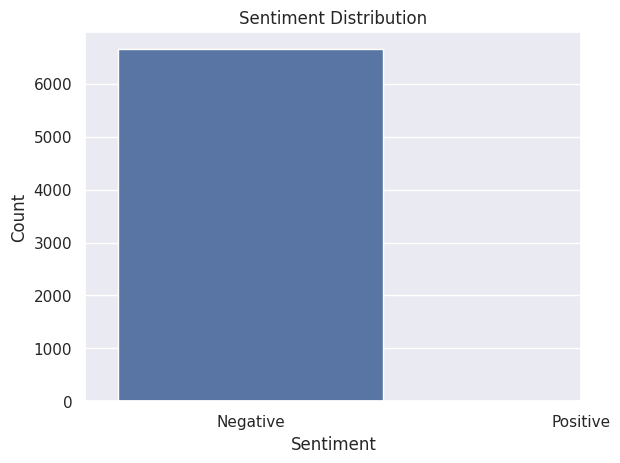

In [10]:
# sns.set(style="darkgrid")
sns.countplot(df["sentiment"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks([0, 1], ["Negative", "Positive"])  # Customizing x-axis labels
plt.show()

In [13]:
df.shape

(6652, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   6652 non-null   object
 1   sentiment  6652 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.1+ KB


In [15]:
df.isnull().sum()

sentence     0
sentiment    0
dtype: int64

Install bnltk library

In [16]:
pip install bnltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=1b68a1512a78f1029cfd5d9b508648143c9bcb3a4cabc800b6fa40fd9b68aad3
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


**Tokenize**

In [17]:
from bnltk.tokenize import Tokenizers

t = Tokenizers()
print(t.bn_word_tokenizer("আর্জেন্টিনা দক্ষিণ আমেরিকার একটি রাষ্ট্র। বুয়েনোস আইরেস দেশটির বৃহত্তম শহর ও রাজধানী।"))

['আর্জেন্টিনা', 'দক্ষিণ', 'আমেরিকার', 'একটি', 'রাষ্ট্র', 'বুয়েনোস', 'আইরেস', 'দেশটির', 'বৃহত্তম', 'শহর', 'ও', 'রাজধানী']


**Stemming**

In [18]:
from bnltk.stemmer import BanglaStemmer
bn_stemmer = BanglaStemmer()
print(bn_stemmer.stem('ক্রিকেটের'))

ক্রিকেট


In [20]:
pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 64.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=66d3bdbc99ed626cc16a9a5898f696ccc16ada70ade5da2c23f48dc22cc4fe07
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


Use bnlp tokenizer

In [21]:
from bnlp import BasicTokenizer
from bnlp import NLTKTokenizer
tk = NLTKTokenizer()
text = "আর্জেন্টিনা দক্ষিণ আমেরিকার একটি রাষ্ট্র। বুয়েনোস আইরেস দেশটির বৃহত্তম শহর ও রাজধানী।"
word_tokens = tk.word_tokenize(text)
word_tokens

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['আর্জেন্টিনা',
 'দক্ষিণ',
 'আমেরিকার',
 'একটি',
 'রাষ্ট্র',
 '।',
 'বুয়েনোস',
 'আইরেস',
 'দেশটির',
 'বৃহত্তম',
 'শহর',
 'ও',
 'রাজধানী',
 '।']

get stopwords,punctuation,letter,digits

In [22]:
from bnlp.corpus import stopwords, punctuations, letters, digits

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
df.sentence[2]

'এই পাপন সভাপতি হওয়ার পর থেকে ক্রিকেটের দুরবস্থা'

In [25]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

result = remove_stopwords(df.sentence[2], stopwords)
result

['পাপন', 'সভাপতি', 'হওয়ার', 'ক্রিকেটের', 'দুরবস্থা']

In [26]:
df.sentence[3]

'ধন্যবাদ বিবিসি বাংলাকে নির্যাতিত সাংবাদিকদের পাশে থাকার জন্য'

In [27]:
result = remove_stopwords(df.sentence[3], stopwords)
a = [bn_stemmer.stem(word) for word in result] 
a

['ধন্যবাদ', 'বিবিসি', 'বাংলা', 'নির্যাতিত', 'সাংবাদিক', 'পাশ', 'থাক']

In [28]:
import regex as re
re.sub('[^\u0980-\u09FF]',' ', str(df.sentence[50]))

'লাইন গ্যাসে মিটার বসালে আর না হয় সব গ্যাস বোতল জাত করা হলে অপচয় কিছুটা হলে রোধ পাবে'

In [29]:
from bnltk.tokenize import Tokenizers

from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

from bnltk.stemmer import BanglaStemmer
bn_stemmer = BanglaStemmer()
tokenizer = Tokenizers()

text_final = []

for i in range(len(df["sentence"])):
    
    punc_less = re.sub('[^\u0980-\u09FF]',' ',str(df.sentence[i])) #removing unnecessary punctuation

    result = remove_stopwords(punc_less, stopwords)
    
    sentence_final_words = [bn_stemmer.stem(word) for word in result] 
    
    final_txt = ' '.join(sentence_final_words)
    
    text_final.append(final_txt)

In [30]:
text_final[6]

'ভাইর এ একটু আইন প্রনয়ন হোকবেশি বিজ্ঞাপন অনুষ্ঠান মন দি যায়নাঅতিরিক্ত বিজ্ঞাপন কারন মন যায়ভিন্ন আরেক চ্যানেলেঅতঃপর কোন মজা থাকেনা এক কথা অনুষ্ঠান সুন্দর বিজ্ঞাপন একটু কমি দিনবাংলা চাযা বিজ্ঞাপন দেখি অনুষ্ঠান দেখিনা'

In [31]:
df.sentence[6]

'ভাইরে এটার ব্যাপারে একটু নতুন আইন প্রনয়ন করা হোকবেশি বিজ্ঞাপনে একটি অনুষ্ঠান মন দিয়ে দেখা যায়নাঅতিরিক্ত বিজ্ঞাপনের কারনে মন চলে যায়ভিন্ন আরেকটি চ্যানেলেঅতঃপর কোনটার মজাই থাকেনা এক কথায় অনুষ্ঠান সুন্দর ভাবে দেখতে হলে বিজ্ঞাপন একটু কমিয়ে দিনবাংলা চ্যানেলে মনে হয় যেন বিজ্ঞাপন ই দেখি অনুষ্ঠান দেখিনা'

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectorize_data = vectorizer.fit_transform(text_final).toarray()

In [33]:
np.all(train_vectorize_data[::] >= 0 )

True

In [34]:
np.any(train_vectorize_data[::] >=1 )

True

In [35]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['অইখ', 'অইগ', 'অইবন', ..., 'ৱত', 'ৱন', 'ৱয়'], dtype=object)

In [36]:
len(feature_names)

2896

Split train data and test Data

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_vectorize_data, df.sentiment.values, test_size = 0.25, random_state = 42)

In [38]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_train

array([0, 0, 1, ..., 1, 0, 0])

Build the model

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB

sentiment_detection_model = MultinomialNB().fit(X_train, y_train)
y_pred = sentiment_detection_model.predict(X_valid)

print("Report :\n" , classification_report(y_valid,y_pred))

print(" Confussion Matrix :\n" , confusion_matrix(y_valid,y_pred))

print("Accuracy : ", accuracy_score(y_valid, y_pred)*100 , "%")


Report :
               precision    recall  f1-score   support

           0       0.65      0.84      0.73       912
           1       0.70      0.45      0.55       751

    accuracy                           0.66      1663
   macro avg       0.67      0.65      0.64      1663
weighted avg       0.67      0.66      0.65      1663

 Confussion Matrix :
 [[765 147]
 [412 339]]
Accuracy :  66.38604930847866 %


In [41]:
from sklearn.svm import SVC,LinearSVC

In [42]:
svc = LinearSVC()
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6470234515935057
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.71       912
           1       0.64      0.50      0.56       751

    accuracy                           0.65      1663
   macro avg       0.65      0.63      0.63      1663
weighted avg       0.65      0.65      0.64      1663



In [43]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
# LSTM model
embedding_dim = 100
max_sequence_length = 100

model = Sequential()
model.add(Embedding(len(vectorizer.vocabulary_), embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Convert text sequences to padded sequences
X_train_pad = pad_sequences(X_train, maxlen=max_sequence_length)
X_valid_pad = pad_sequences(X_valid, maxlen=max_sequence_length)

# Train the LSTM model
model.fit(X_train_pad, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
156/156 [==============================] - 19s 97ms/step - loss: 0.6909 - accuracy: 0.5418
Epoch 2/10
156/156 [==============================] - 15s 97ms/step - loss: 0.6900 - accuracy: 0.5418
Epoch 3/10
156/156 [==============================] - 15s 97ms/step - loss: 0.6901 - accuracy: 0.5418
Epoch 4/10
156/156 [==============================] - 15s 98ms/step - loss: 0.6907 - accuracy: 0.5418
Epoch 5/10
156/156 [==============================] - 15s 97ms/step - loss: 0.6901 - accuracy: 0.5418
Epoch 6/10
156/156 [==============================] - 15s 98ms/step - loss: 0.6900 - accuracy: 0.5418
Epoch 7/10
156/156 [==============================] - 15s 97ms/step - loss: 0.6898 - accuracy: 0.5418
Epoch 8/10
156/156 [==============================] - 15s 97ms/step - loss: 0.6900 - accuracy: 0.5418
Epoch 9/10
156/156 [==============================] - 15s 98ms/step - loss: 0.6900 - accuracy: 0.5418
Epoch 10/10
156/156 [==============================] - 15s 98ms/step - loss: 0.689

In [48]:
# Make predictions using the LSTM model
# y_pred_lstm = model.predict_classes(X_valid_pad).flatten()

y_pred_lstm=model.predict(X_valid_pad) 
classes_x=np.argmax(y_pred_lstm, axis=1)

52/52 [==============================] - 2s 24ms/step


In [49]:
# AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
y_pred_adaboost = adaboost.predict(X_valid)

In [63]:
y_pred_combined = np.concatenate((y_pred_lstm.reshape(-1, 1), y_pred_adaboost.reshape(-1, 1)), axis=1)

# Take the mode of the combined predictions
y_pred_combined = np.argmax(y_pred_combined, axis=1)

# Calculate accuracy for the combined predictions
accuracy = accuracy_score(y_valid, y_pred_combined)

# Generate classification report for the combined predictions
report = classification_report(y_valid, y_pred_combined)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6355983162958508
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.83      0.71       912
           1       0.66      0.40      0.50       751

    accuracy                           0.64      1663
   macro avg       0.64      0.61      0.61      1663
weighted avg       0.64      0.64      0.62      1663



In [ ]:
import pickle
with open('sentiment_detection_model','wb') as file:
    pickle.dump(sentiment_detection_model,file)

with open('sentiment_detection_model','rb') as file:
    model = pickle.load(file)

In [ ]:
def classifyNB(text):
  X = vectorizer.transform([text]).toarray()
  y_pred = model.predict(X)
  if y_pred ==1:
    return "Positive"
  else:
    return "Negative"

In [ ]:
text = "একজন ভালো মানুষ"
# text = "পাপন একজন ভালো সভাপতি"

out = classifyNB(text)
print(out)


Positive


trying Adaboost,lstm model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

In [ ]:
sentiModel=adaboost.fit(X_train,y_train)

In [ ]:
y_pred=sentiModel.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(" Confussion Matrix :\n" , confusion_matrix(y_valid,y_pred))

print("Accuracy : ", accuracy_score(y_valid, y_pred)*100 , "%")

 Confussion Matrix :
 [[856  56]
 [553 198]]
Accuracy :  63.37943475646423 %
